<a href="https://colab.research.google.com/github/PemmasaniJahnavi/IIIT_labs/blob/main/Probability_Primer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px

In [4]:
def toss_coin(number_of_tosses=100):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=100):
    return pd.Series(np.random.randint(1, 6+1, number_of_tosses))

results = toss_coin()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

Tails    56
Heads    44
Name: count, dtype: int64


In [5]:
results = pd.Series([np.sum(toss_coin(20) == 'Heads') for _ in range(1000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [6]:
results = pd.Series([np.sum(toss_coin(500) == 'Heads') for _ in range(5000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

In [7]:
results = {shots: throw_dice(shots) for shots in [10, 100, 1000, 10000, 1000000]}
fig = pg.Figure([pg.Bar(x=result.value_counts().keys(),
                        y=result.value_counts().values / shots,)
                    for shots, result in results.items()])
fig.add_shape(type='line', x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Red',))
fig.show()

In [8]:
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']

    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        cards_thrown = 0
        cards_pile = []
        while len(deck_of_cards) > 0:
            picked_card = np.random.choice(deck_of_cards)
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1
            deck_of_cards.remove(picked_card)
        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)

    return np.mean(cards_thrown_counts), cards_thrown_counts

expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')

16 cards were thrown: 2H 8H 4C 4H 5D 6S 7S 10C 2C 7D 3C KD 9C JS 2S 2D AH
15 cards were thrown: 7C KS 4H 9H 10D QD 10C 7D 9D 3D 5D 3H JS 2S 3C AC
18 cards were thrown: 4C 3C 8H 2D 6C 5H 8C 5D KH 2C 7D 8D 10S 4D 5C JH 7C 9H AS
14 cards were thrown: 10C 7D 10D 3C 3H 7S 4H 8S 2H 10H 5H 6D 3S 2D AD
5 cards were thrown: JD 6S 6C 6H 8C AC
13 cards were thrown: 10S KC 5H 9C 9H KH 10C 3D 2C 2D 5C 4S 10D AD
12 cards were thrown: 10H 9C 8H 3C 5D 2D KD 3S 4D 8S 2S 9H AS
19 cards were thrown: 4S 5D 2C 8H 5C JC 3C QC 3H 3S 6H KC 9S 4C 7C 2D JD 5S 7H AD
8 cards were thrown: 4S 4D JC 3C 6C KD 8S 7S AD
12 cards were thrown: 5H 7H 7S 5C QC 8D 4S 9H QD 6S 6H 9C AH

9.5798 cards are tossed before we see the first ace!


In [9]:
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

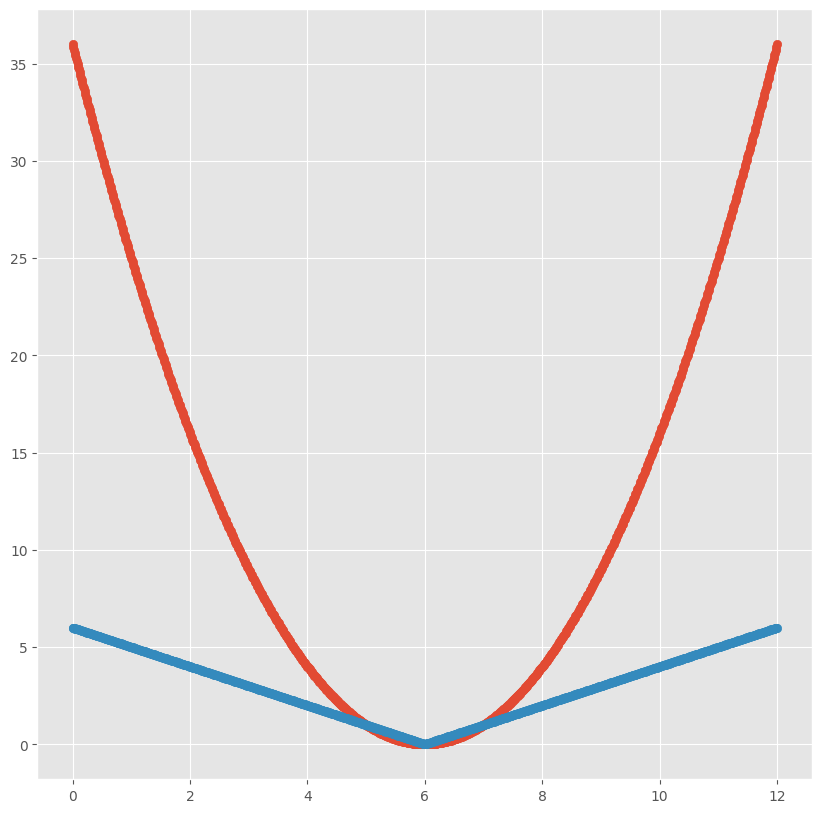

In [10]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

measurements = np.linspace(0, 12, 1000)
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error')
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()

In [25]:
grades = pd.read_csv("grades.csv")
print(grades.shape)

(26, 4)


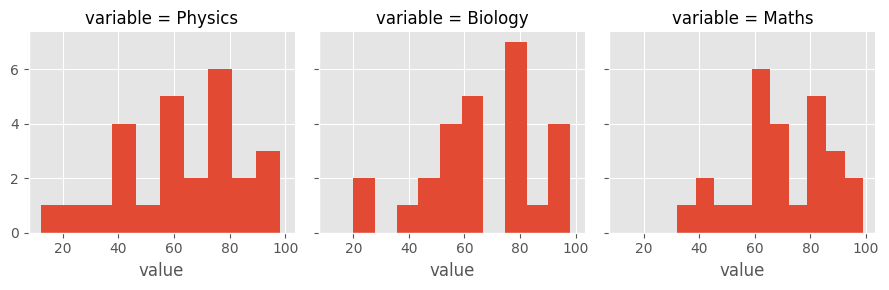

In [26]:
g = sns.FacetGrid(grades.melt("Name"), col="variable")
g.map(plt.hist, "value")

In [27]:
grades["Physics_std"] = (grades["Physics"] - grades["Physics"].mean()) / grades["Physics"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std
0,Arnold,80,78,70,0.713673
1,Bob,60,98,45,-0.165735
2,Cassandra,34,56,65,-1.308965
3,Donovan,56,65,32,-0.341616
4,Emily,98,23,55,1.505141


In [28]:
grades["Maths_std"] = (grades["Maths"] - grades["Maths"].mean()) / grades["Maths"].std()
grades.head()

,Name,Physics,Biology,Maths,Physics_std,Maths_std
0,Arnold,80,78,70,0.713673,0.013309
1,Bob,60,98,45,-0.165735,-1.428471
2,Cassandra,34,56,65,-1.308965,-0.275047
3,Donovan,56,65,32,-0.341616,-2.178196
4,Emily,98,23,55,1.505141,-0.851759


In [29]:
from scipy.stats import binom

0.3671875

In [30]:
binom.pmf(k=5, n=5, p=0.25)

0.0009765625

In [31]:
1 - binom.pmf(k=4, n=5, p=0.75) - binom.pmf(k=5, n=5, p=0.75)

0.3671875

In [32]:
binom.cdf(3, n=5, p=0.75)

0.3671875

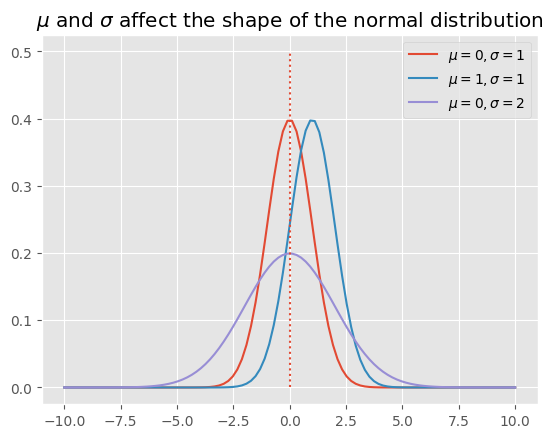

In [33]:
from scipy.stats import norm
x = np.linspace(-10, 10, 100)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)

plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")

plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()

In [34]:
norm.cdf(0)

0.5

In [35]:
norm.ppf(0.5)

0.0

In [37]:
norm.ppf(0.84, loc=169.57, scale=7.57)

177.09804617589782

In [38]:
169.57 + 7.57

177.14

In [39]:
norm.ppf(0.975, loc=169.57, scale=7.57)

184.4069273629682

In [40]:
169.57 + 2 * 7.57

184.70999999999998

In [41]:
norm.ppf(0.0015, loc=169.57, scale=7.57)

147.10422390516268

In [42]:
169.57 - 3 * 7.57

146.85999999999999

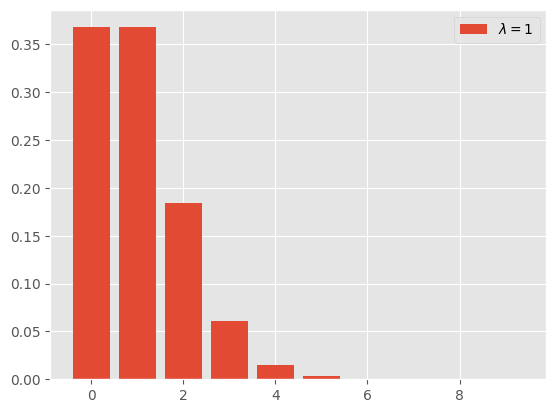

In [43]:
from scipy.stats import poisson
x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)

plt.bar(x, f1, label="$\lambda=1$")
plt.legend()


In [44]:
x @ f1

0.999998874797402

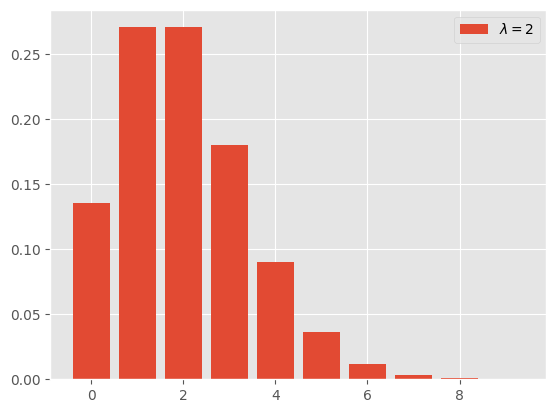

In [45]:
plt.bar(x, f2, label="$\lambda=2$")
plt.legend()

In [46]:
x @ f2

1.999525105343477

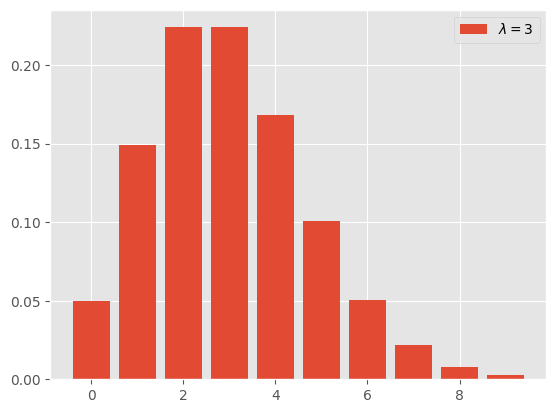

In [47]:
plt.bar(x, f3, label="$\lambda=3$")
plt.legend()

In [ ]:
x @ f3

In [48]:
poisson.pmf(3, 5)

0.1403738958142805

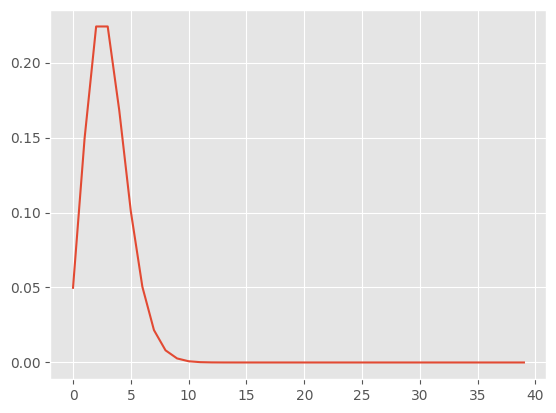

In [49]:
from scipy.stats import poisson
bins = np.arange(0, 40)
p_pois = poisson.pmf(bins, mu=3)
plt.plot(bins, p_pois)

(array([ 7., 29., 57., 81., 93., 71., 37., 17.,  5.,  3.]),
 array([1.95 , 2.185, 2.42 , 2.655, 2.89 , 3.125, 3.36 , 3.595, 3.83 ,
        4.065, 4.3  ]),
 <BarContainer object of 10 artists>)

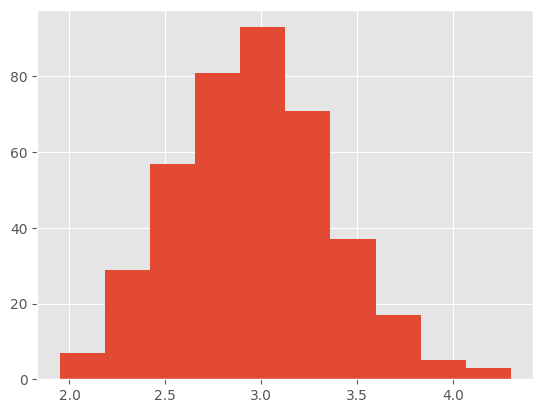

In [50]:
def sample_pois(_):
    samples = poisson.rvs(mu=3, size=20)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(400)))
plt.hist(means)

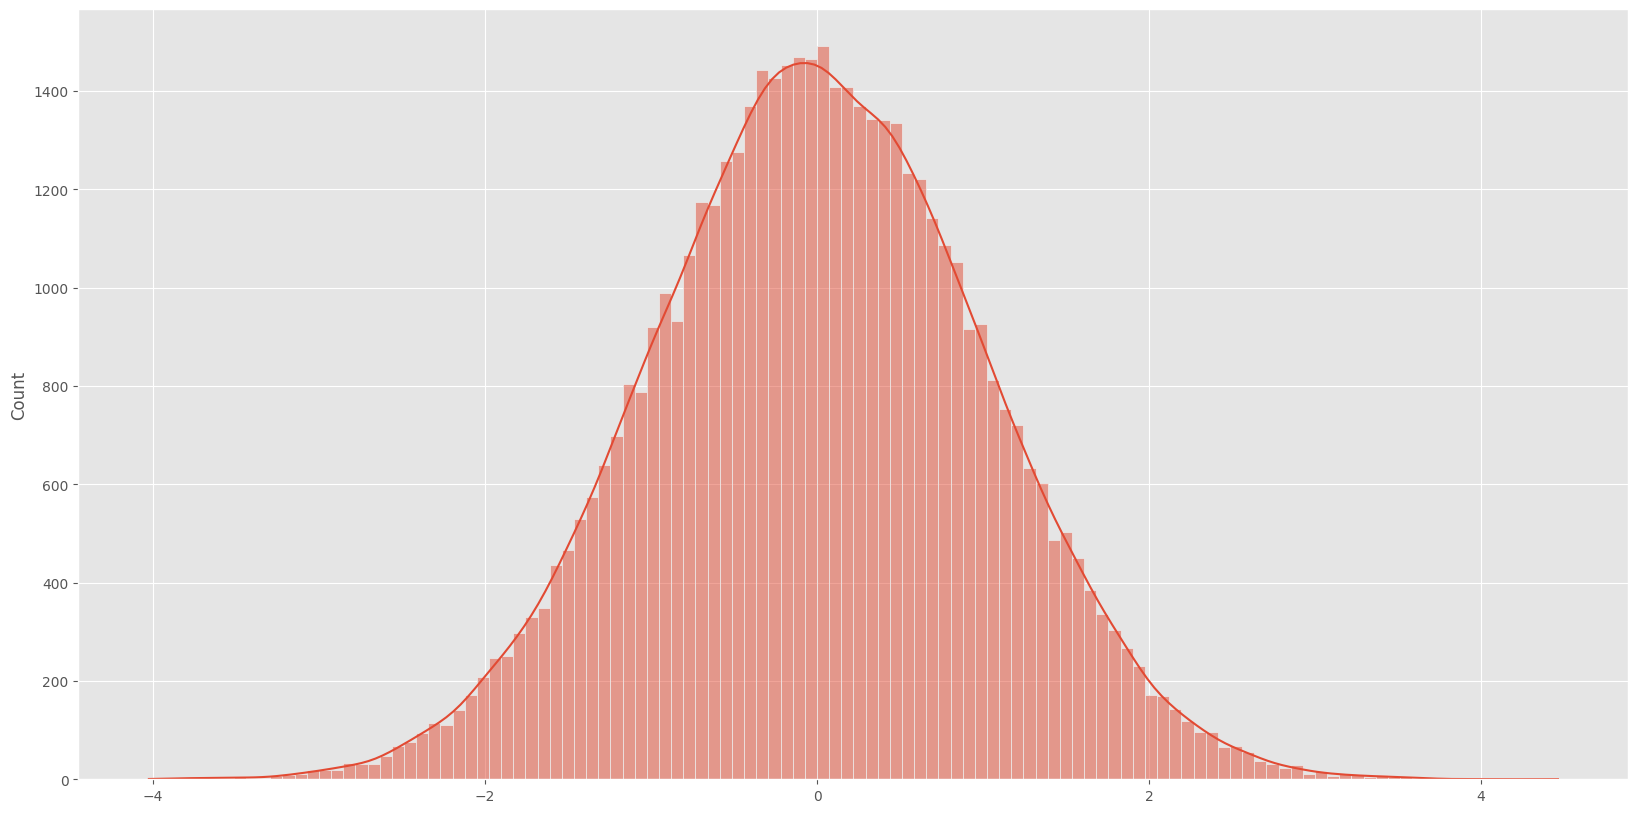

In [51]:
import seaborn as sns
plt.figure(figsize=(20, 10))
x = np.random.normal(size=(50000))
sns.histplot(x, kde=True)
plt.show()

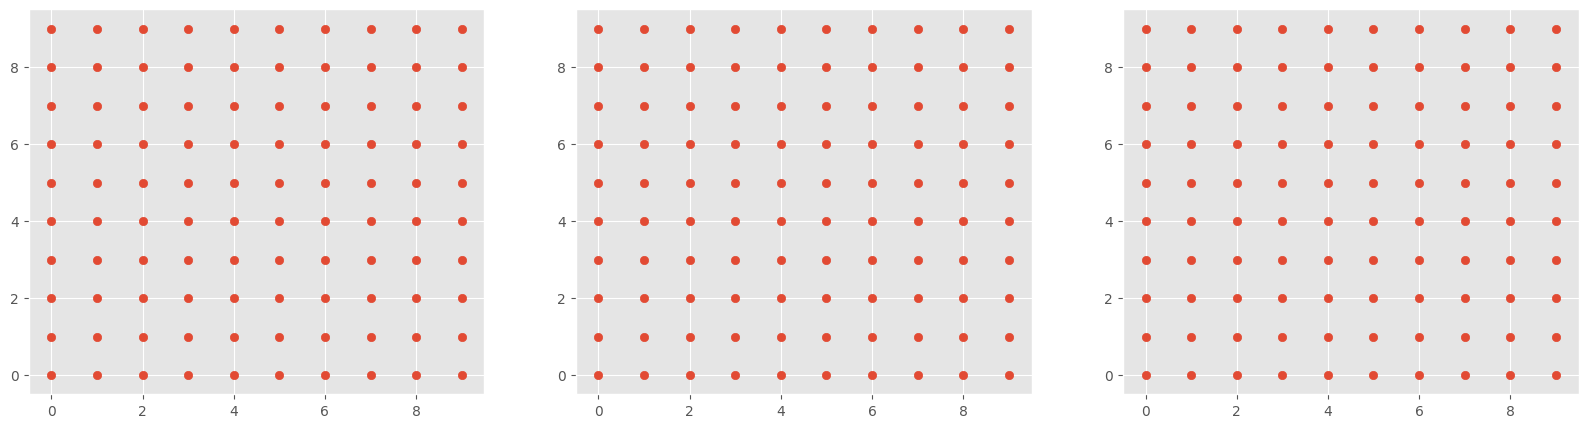

In [52]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.meshgrid(np.arange(10), np.arange(10))
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

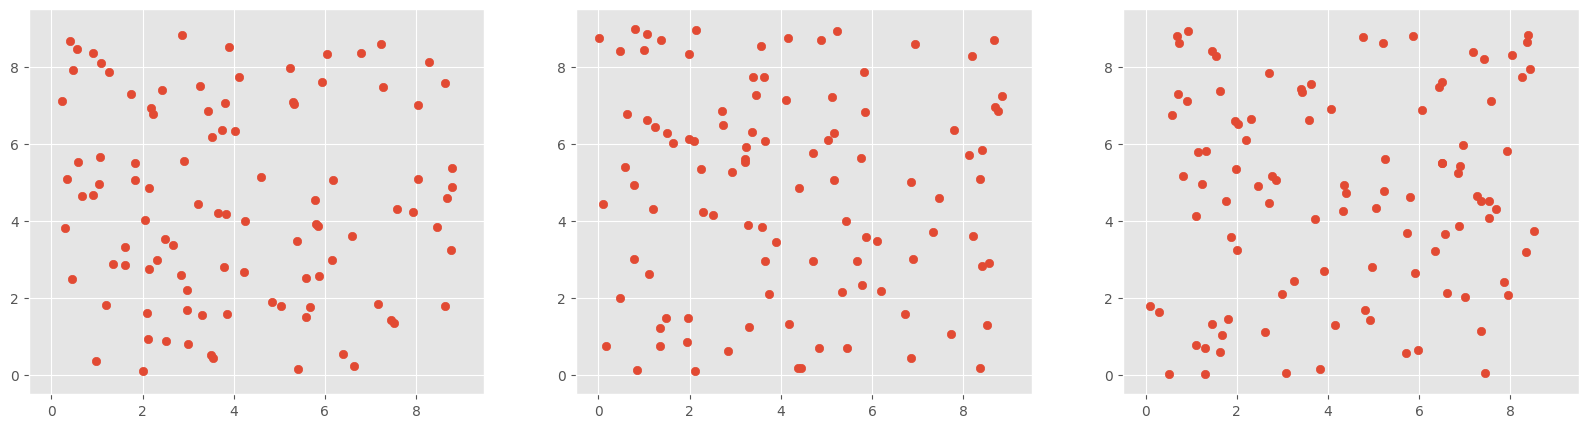

In [53]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.random(100) * 9, np.random.random(100) * 9
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()

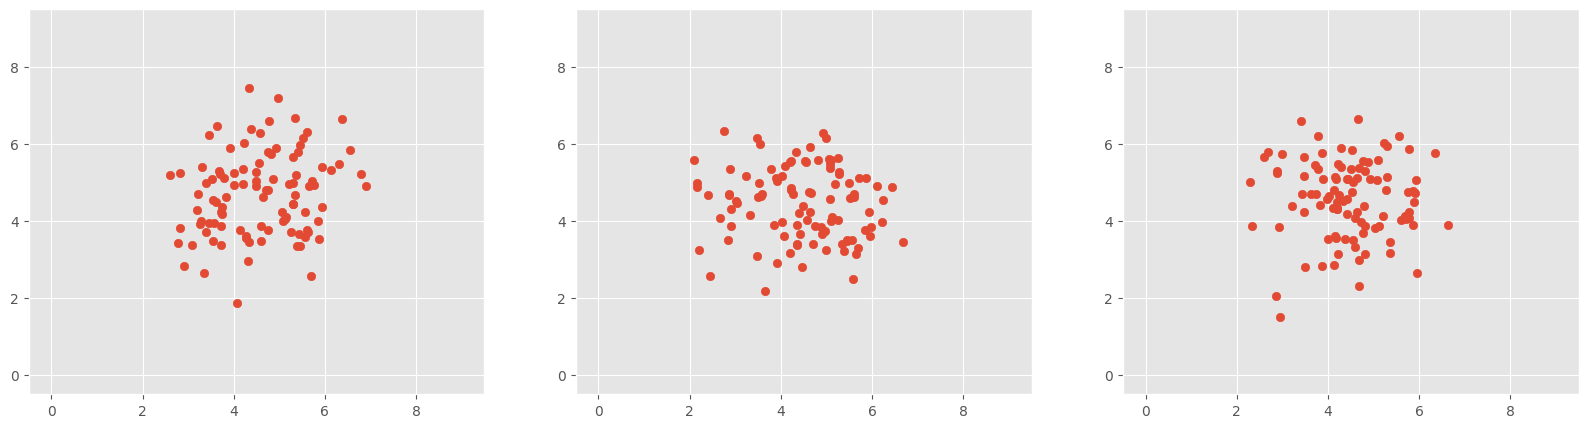

In [54]:
fix, axs = plt.subplots(1, 3, figsize=(20, 5))

for ax in axs:
    x, y = np.random.normal(loc=4.5, scale=1.0, size=100), np.random.normal(loc=4.5, scale=1.0, size=100)
    ax.scatter(x.ravel(), y.ravel())
    ax.set_xlim(-0.5, 9.5)
    ax.set_ylim(-0.5, 9.5)

plt.show()